In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 4.0 MB 30.2 MB/s 
     |████████████████████████████████| 110 kB 76.8 MB/s 
     |████████████████████████████████| 128 kB 80.4 MB/s 
     |████████████████████████████████| 112 kB 79.2 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2022-12-30 08:17:25--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-30 08:17:25--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-30 08:17:25--  http://netcologne.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netcologn

In [3]:
#base
import numpy as np
import pandas as pd
from collections import Counter
import ssl
from copy import deepcopy


#visual
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.font_manager import fontManager
from tqdm.notebook import tqdm


#time
import datetime as dt
 
#finance
import yfinance as yf
import talib

#model
import sklearn
from sklearn.preprocessing import StandardScaler

#一、资料载入

In [4]:

#data=yf.download('2330.TW','2021-01-01','2022-12-25')
data= yf.Ticker('2330.TW').history(period="max")

In [ ]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04 00:00:00+08:00,35.393482,35.393482,34.796967,35.393482,200662336736,0.0,0.0
2000-01-05 00:00:00+08:00,35.393492,36.188782,34.995752,36.188782,402466805912,0.0,0.0
2000-01-06 00:00:00+08:00,35.989997,36.188772,35.393482,35.393482,197545715802,0.0,0.0
2000-01-07 00:00:00+08:00,34.200464,34.796979,33.802724,34.399239,235270344752,0.0,0.0
2000-01-10 00:00:00+08:00,35.393495,35.791045,34.796980,35.592270,276171685539,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,0.0,0.0
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,0.0,0.0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,0.0,0.0


#二、特徵指標

技術指標：https://tw.stock.yahoo.com/news/%E6%8A%80%E8%A1%93%E5%88%86%E6%9E%90-%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-kd%E5%80%BC-085812299.html

https://chan-yi.com/%E5%8B%95%E9%87%8F%E6%8C%87%E6%A8%99/



KD：隨機指標，表示目前價格相對過去一段期間的高低變化。

RSI：股價強弱指標，表示買賣盤雙方力道的強弱。https://chan-yi.com/rsi%e6%8c%87%e6%a8%99%e5%af%a6%e6%88%b0%e5%85%a8%e8%a7%a3%e6%9e%90/

MACD：長期與短期移動平均線收斂或發散指標。https://chan-yi.com/5%e5%88%86%e9%90%98%e5%ad%b8%e6%9c%83macd%e6%8c%87%e6%a8%99%ef%bc%8c%e6%89%be%e5%88%b0%e6%bc%b2%e8%b7%8c%e9%96%93%e7%9a%84%e8%b2%b7%e8%b3%a3%e9%bb%9e/

MOM：主要是用來觀察價格走勢的變化幅度，以及行情的趨動方向。https://zhuanlan.zhihu.com/p/344764319

總經指標：

台股平均本益比：以上市公司取平均，可看出整體投資人對整個市場的看法是樂觀還是悲觀。


## 2.1 技術指標：KD、RSI、MACD、MOM

In [5]:

data["rsi"] = talib.RSI(data["Close"], timeperiod=14)# type: ignore
data['macd'], data['macdsig'],data['macdhist'] = talib.MACD(data["Close"], fastperiod=12, slowperiod=26, signalperiod=9)# type: ignore
data['kdf'], data['kds'] = talib.STOCH(data['High'], data['Low'], data['Close'], fastk_period=9,slowk_period=3,slowk_matype=1,slowd_period=3,slowd_matype=1)# type: ignore
data["mom"] = talib.MOM(data["Close"],timeperiod=15)# type: ignore

In [6]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,macd,macdsig,macdhist,kdf,kds,mom
Date,,,,,,,,,,,,,,
2000-01-04 00:00:00+08:00,35.393494,35.393494,34.796979,35.393494,200662336736,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05 00:00:00+08:00,35.393488,36.188778,34.995748,36.188778,402466805912,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06 00:00:00+08:00,35.990009,36.188784,35.393494,35.393494,197545715802,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07 00:00:00+08:00,34.200460,34.796975,33.802720,34.399235,235270344752,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10 00:00:00+08:00,35.393495,35.791045,34.796980,35.592270,276171685539,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,0.0,0.0,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,0.0,0.0,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313
2022-12-28 00:00:00+08:00,451.000000,452.000000,446.000000,451.000000,32578949,0.0,0.0,42.628915,-1.270174,2.772585,-4.042759,16.491802,15.810472,-21.281494


## 2.2 總經指標：台股平均本益比

# 三、刪除空值與無用欄位

In [7]:
data = data.fillna(method="pad",axis=0)
data = data.dropna(axis=0)
#del data["Adj Close"]
del data["Dividends"]
del data["Stock Splits"]

#四、買賣訊號

用移動平均MA結合動能指標RSI來定義趨勢，簡單運用MA10 > MA20 且 RSI10 >RSI20時，判斷為上升趨勢



In [8]:
data["short_mom"] = data["rsi"].rolling(window=10,min_periods=1,center=False).mean()
data["long_mom"] = data["rsi"].rolling(window=20,min_periods=1,center=False).mean()
data["short_mov"] = data["Close"].rolling(window=10,min_periods=1,center=False).mean()
data["long_mov"] = data["Close"].rolling(window=20,min_periods=1,center=False).mean()

In [ ]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,short_mom,long_mom,short_mov,long_mov
Date,,,,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153929,42.551669,41.159864,41.358639,121805090619,58.679950,1.770317,2.112726,-0.342409,41.626380,50.618429,0.795292,58.679950,58.679950,41.358639,41.358639
2000-02-21 00:00:00+08:00,40.364383,40.364383,38.773617,38.773617,153903007581,43.938751,1.409378,1.972056,-0.562679,20.813190,35.715810,-1.590767,51.309350,51.309350,40.066128,40.066128
2000-02-22 00:00:00+08:00,38.177102,39.370132,37.779552,38.773617,168143612807,43.938751,1.110529,1.799751,-0.689222,18.218043,26.966926,-1.391975,48.852484,48.852484,39.635291,39.635291
2000-02-23 00:00:00+08:00,38.773616,38.773616,38.376066,38.574841,73892584628,42.975946,0.847876,1.609376,-0.761500,15.358468,21.162697,-1.590752,47.383350,47.383350,39.370178,39.370178
2000-02-24 00:00:00+08:00,38.773617,39.171357,38.574842,38.773617,83371097848,44.290577,0.648288,1.417158,-0.768870,16.606797,18.884747,-1.391975,46.764795,46.764795,39.250866,39.250866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,44.515638,1.467386,5.857419,-4.390033,16.220131,21.082147,-34.681335,50.700721,55.758652,467.633301,474.605638
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,49.862471,54.901708,466.055151,473.543138
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,49.240059,53.960695,464.875000,472.182498


In [9]:
# 標記Labels,上升趨勢標的為1，反之標記為0
data['label'] = np.where((data.short_mov > data.long_mov) & (data.short_mom > data.long_mom), 1, 0)

In [ ]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,short_mom,long_mom,short_mov,long_mov,label
Date,,,,,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153929,42.551669,41.159864,41.358639,121805090619,58.679950,1.770317,2.112726,-0.342409,41.626380,50.618429,0.795292,58.679950,58.679950,41.358639,41.358639,0
2000-02-21 00:00:00+08:00,40.364383,40.364383,38.773617,38.773617,153903007581,43.938751,1.409378,1.972056,-0.562679,20.813190,35.715810,-1.590767,51.309350,51.309350,40.066128,40.066128,0
2000-02-22 00:00:00+08:00,38.177102,39.370132,37.779552,38.773617,168143612807,43.938751,1.110529,1.799751,-0.689222,18.218043,26.966926,-1.391975,48.852484,48.852484,39.635291,39.635291,0
2000-02-23 00:00:00+08:00,38.773616,38.773616,38.376066,38.574841,73892584628,42.975946,0.847876,1.609376,-0.761500,15.358468,21.162697,-1.590752,47.383350,47.383350,39.370178,39.370178,0
2000-02-24 00:00:00+08:00,38.773617,39.171357,38.574842,38.773617,83371097848,44.290577,0.648288,1.417158,-0.768870,16.606797,18.884747,-1.391975,46.764795,46.764795,39.250866,39.250866,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00+08:00,457.500000,458.500000,455.000000,455.000000,24927413,44.515638,1.467386,5.857419,-4.390033,16.220131,21.082147,-34.681335,50.700721,55.758652,467.633301,474.605638,0
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,49.862471,54.901708,466.055151,473.543138,0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,49.240059,53.960695,464.875000,472.182498,0


In [10]:
# 刪除非特徵指標
data = data.drop(columns=["short_mov"])
data = data.drop(columns=["long_mov"])
data = data.drop(columns=["short_mom"])
data = data.drop(columns=["long_mom"])

In [22]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,label
Date,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153925,42.551665,41.159860,41.358635,121805090619,58.679917,1.770317,2.112726,-0.342410,41.626129,50.618192,0.795292,0
2000-02-21 00:00:00+08:00,40.364391,40.364391,38.773624,38.773624,153903007581,43.938754,1.409378,1.972057,-0.562679,20.813065,35.715628,-1.590759,0
2000-02-22 00:00:00+08:00,38.177109,39.370140,37.779559,38.773624,168143612807,43.938754,1.110530,1.799751,-0.689222,18.217977,26.966802,-1.391975,0
2000-02-23 00:00:00+08:00,38.773612,38.773612,38.376062,38.574837,73892584628,42.975893,0.847876,1.609376,-0.761500,15.358343,21.162573,-1.590763,0
2000-02-24 00:00:00+08:00,38.773624,39.171364,38.574849,38.773624,83371097848,44.290600,0.648288,1.417159,-0.768870,16.606754,18.884663,-1.391975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,0
2022-12-28 00:00:00+08:00,451.000000,452.000000,446.000000,451.000000,32578949,42.628915,-1.270174,2.772585,-4.042759,16.491802,15.810472,-21.281494,0


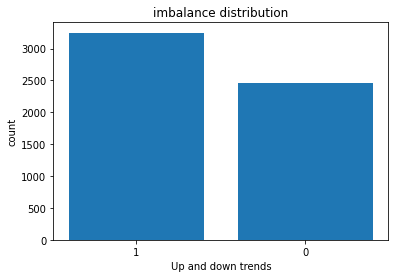

In [12]:
# 觀察資料分佈是否均匀
data['label'].value_counts()

plt.title('imbalance distribution')
plt.xlabel('Up and down trends')
plt.ylabel('count')
plt.bar(['1','0'], data['label'].value_counts())
plt.show()


#五、資料前處理

In [23]:
# 資料標準化
X = data.drop('label', axis = 1)
X[X.columns] = StandardScaler().fit_transform(X[X.columns])
y = pd.DataFrame({"label":data.label})

In [24]:
X

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom
Date,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,-0.540698,-0.540748,-0.544461,-0.545974,2.536698,0.559231,0.320413,0.432836,-0.293127,-0.448917,-0.129076,-0.023404
2000-02-21 00:00:00+08:00,-0.552246,-0.554768,-0.559985,-0.562665,3.328091,-0.776293,0.227813,0.394549,-0.482257,-1.215615,-0.729841,-0.203309
2000-02-22 00:00:00+08:00,-0.566360,-0.561141,-0.566452,-0.562665,3.679202,-0.776293,0.151142,0.347652,-0.590911,-1.311211,-1.082532,-0.188321
2000-02-23 00:00:00+08:00,-0.562511,-0.564964,-0.562571,-0.563949,1.355386,-0.863527,0.083757,0.295837,-0.652971,-1.416553,-1.316517,-0.203309
2000-02-24 00:00:00+08:00,-0.562511,-0.562415,-0.561278,-0.562665,1.589085,-0.744417,0.032551,0.243521,-0.659299,-1.370565,-1.408346,-0.188321
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,2.116904,2.115749,2.137996,2.134515,-0.466263,-0.646084,-0.005855,1.160334,-3.680128,-1.486217,-1.473249,-2.322806
2022-12-27 00:00:00+08:00,2.142716,2.151003,2.160765,2.137743,-0.466227,-0.618691,-0.191813,0.887514,-3.441813,-1.504032,-1.559742,-1.460470
2022-12-28 00:00:00+08:00,2.097545,2.083701,2.089205,2.099002,-0.465676,-0.894963,-0.459640,0.612431,-3.470360,-1.374799,-1.532275,-1.687961


In [25]:
y

,label
Date,
2000-02-18 00:00:00+08:00,0
2000-02-21 00:00:00+08:00,0
2000-02-22 00:00:00+08:00,0
2000-02-23 00:00:00+08:00,0
2000-02-24 00:00:00+08:00,0
...,...
2022-12-26 00:00:00+08:00,0
2022-12-27 00:00:00+08:00,0
2022-12-28 00:00:00+08:00,0


## 5.2 資料分割

In [26]:
# 切割成學習樣本以及測試樣本，比例為7：3
split = int(len(data)*0.7)
train_X = X.iloc[:split,:].copy()
test_X = X.iloc[split:].copy()
train_y = y.iloc[:split,:].copy()
test_y = y.iloc[split:].copy()
X_train, y_train, X_test, y_test = np.array(train_X), np.array(train_y), np.array(test_X), np.array(test_y)


In [77]:
# 將資料維度改成三維符合接下來模型所需
X_train = np.reshape(X_train, (X_train.shape[0],1,-1))
y_train = np.reshape(y_train, (y_train.shape[0],1,1))
X_test = np.reshape(X_test, (X_test.shape[0],1,-1))
y_test = np.reshape(y_test, (y_test.shape[0],1,1))

In [78]:
y_test

array([[[0]],

       [[0]],

       [[0]],

       ...,

       [[0]],

       [[0]],

       [[0]]])

# 六、模型測試

## 6.1 LSTM模型構建

In [28]:
### LSTM 模型
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization

regressor = Sequential()
regressor.add(LSTM(units = 32, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.35))
regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.35))
regressor.add(LSTM(units = 32, return_sequences = True))
regressor.add(Dropout(0.35))
regressor.add(LSTM(units = 32))
regressor.add(Dropout(0.35))
regressor.add(Dense(units = 1,activation="sigmoid"))
regressor.compile(optimizer = 'adam', loss="binary_crossentropy",metrics=["accuracy"])
print(regressor.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 32)             5760      
                                                                 
 batch_normalization_1 (Batc  (None, 1, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 1, 32)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout_5 (Dropout)         (None, 1, 32)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 32)             8320      
                                                      

## 6.2 模型結果(訓練集)

In [29]:

# 將epochs 設定為100次
train_history = regressor.fit(X_train,y_train,batch_size=200,epochs=100,verbose='2',validation_split=0.2)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

## 6.3 模型評估

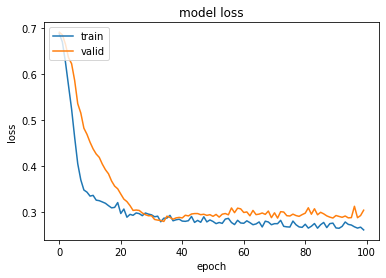

In [30]:
### 模型評估:藉Model loss 圖可看出訓練過程中兩條線有收斂情形，顯示模型無過擬合
loss = train_history.history["loss"]
var_loss = train_history.history["val_loss"]
plt.plot(loss,label="loss")
plt.plot(var_loss,label="val_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("model loss")
plt.legend(["train","valid"],loc = "upper left")
plt.show()

## 6.4 變數重要性

In [83]:
### 變數重要性:顯示MACD、台股平均本益比及RSI為重要特徵值
results = []
bar_X=[]
bar_Y=[]
print(' Computing LSTM feature importance...')
# COMPUTE BASELINE (NO SHUFFLE)
oof_preds = regressor.predict(X_test, verbose='0').squeeze() 
baseline_mae = np.mean(np.abs(oof_preds-y_test))

results.append({'feature':'BASELINE','mae':baseline_mae})           
bar_X.append('BASELINE')
bar_Y.append(baseline_mae)


 Computing LSTM feature importance...


In [84]:
for k in tqdm(range(len(list(test_X.columns)))):
    # SHUFFLE FEATURE K
    save_col = X_test[:,:,k].copy()
    np.random.shuffle(X_test[:,:,k])
                        
    # COMPUTE OOF MAE WITH FEATURE K SHUFFLED
    oof_preds = regressor.predict(X_test, verbose='0').squeeze() 
    mae = np.mean(np.abs( oof_preds-y_test ))
    results.append({'feature':test_X.columns[k],'mae':mae})
    bar_X.append(test_X.columns[k])
    bar_Y.append(mae)
    X_test[:,:,k] = save_col

100%|██████████| 12/12 [00:03<00:00,  3.34it/s]


In [85]:
results


[{'feature': 'BASELINE', 'mae': 0.4721545740946472},
 {'feature': 'Open', 'mae': 0.4707381226827755},
 {'feature': 'High', 'mae': 0.4766444229391769},
 {'feature': 'Low', 'mae': 0.46816280563039536},
 {'feature': 'Close', 'mae': 0.46974813235301716},
 {'feature': 'Volume', 'mae': 0.4721546154303694},
 {'feature': 'rsi', 'mae': 0.4748112904283362},
 {'feature': 'macd', 'mae': 0.4741114492379225},
 {'feature': 'macdsig', 'mae': 0.4736017927397359},
 {'feature': 'macdhist', 'mae': 0.4702065179118023},
 {'feature': 'kdf', 'mae': 0.47831844335484863},
 {'feature': 'kds', 'mae': 0.4677299198629045},
 {'feature': 'mom', 'mae': 0.4737249581312316}]

In [59]:
bar_X


['BASELINE',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'rsi',
 'macd',
 'macdsig',
 'macdhist',
 'kdf',
 'kds',
 'mom']

In [60]:
bar_Y

[0.4721545740946472,
 0.47065736141933256,
 0.4764719674415011,
 0.46749640215368543,
 0.46948791877382273,
 0.47215454096494464,
 0.4746049490369935,
 0.4744008892746888,
 0.4727935051525429,
 0.4710880824974269,
 0.4783902713013418,
 0.4682849620799953,
 0.47346261831422837]

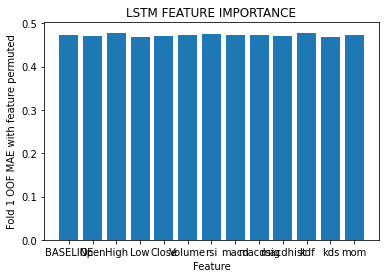

In [86]:
plt.title('LSTM FEATURE IMPORTANCE')
plt.ylabel('Fold 1 OOF MAE with feature permuted')
plt.xlabel('Feature')
plt.bar(bar_X,bar_Y )
plt.show()

## 6.5 模型結果

In [87]:
### 模型結果(測試集)
rate=regressor.evaluate(X_test, y_test,verbose='1')
print('loss:',rate[0])
print('accuracy:',rate[1])

loss: 0.6750593781471252
accuracy: 0.7147024273872375


# 七、策略視覺化

# 八、模型回測

In [71]:
data

,Open,High,Low,Close,Volume,rsi,macd,macdsig,macdhist,kdf,kds,mom,label
Date,,,,,,,,,,,,,
2000-02-18 00:00:00+08:00,42.153925,42.551665,41.159860,41.358635,121805090619,58.679917,1.770317,2.112726,-0.342410,41.626129,50.618192,0.795292,0
2000-02-21 00:00:00+08:00,40.364391,40.364391,38.773624,38.773624,153903007581,43.938754,1.409378,1.972057,-0.562679,20.813065,35.715628,-1.590759,0
2000-02-22 00:00:00+08:00,38.177109,39.370140,37.779559,38.773624,168143612807,43.938754,1.110530,1.799751,-0.689222,18.217977,26.966802,-1.391975,0
2000-02-23 00:00:00+08:00,38.773612,38.773612,38.376062,38.574837,73892584628,42.975893,0.847876,1.609376,-0.761500,15.358343,21.162573,-1.590763,0
2000-02-24 00:00:00+08:00,38.773624,39.171364,38.574849,38.773624,83371097848,44.290600,0.648288,1.417159,-0.768870,16.606754,18.884663,-1.391975,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+08:00,454.000000,457.000000,453.500000,456.500000,8793306,45.375965,0.498588,4.785653,-4.287065,13.467208,17.274678,-29.701355,0
2022-12-27 00:00:00+08:00,458.000000,462.500000,457.000000,457.000000,10264001,45.678329,-0.226237,3.783275,-4.009512,12.983604,15.129141,-18.264313,0
2022-12-28 00:00:00+08:00,451.000000,452.000000,446.000000,451.000000,32578949,42.628915,-1.270174,2.772585,-4.042759,16.491802,15.810472,-21.281494,0


In [72]:
test_data = data.iloc[split:].copy()